**Abhishek Prajapat** - 101816053 <br>
**Lovin Raghava** - 101816036 <br>
**Group** - COSE2

## Loading Libraries

In [1]:
import face_recognition
import cv2
import os
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Face_recognition.ipynb',
 'Face_recognition.pdf',
 'images',
 'sample_image.jpg']

## Basic Analysis

### Difference in Image Channel Sequence

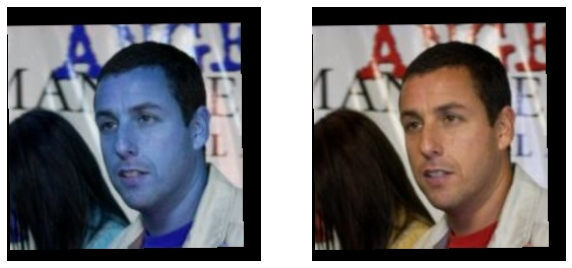

In [3]:
sample_image = './sample_image.jpg'

BRG_img = cv2.imread(sample_image)
RGB_img = np.copy(BRG_img)
RGB_img = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(BRG_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(RGB_img)
plt.axis('off');

### Check the Face detection

(80, 175, 187, 67)
(80, 175, 187, 67)


(-0.5, 249.5, 249.5, -0.5)

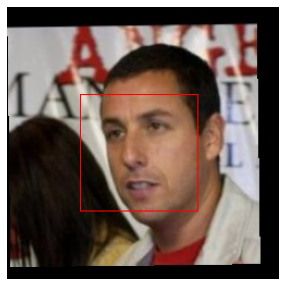

In [13]:
# We can use 2 methods. 1- Use haarCascade 2- Use face_recognition library
# we will use the face_reconition library inbuilt function

img = cv2.imread(sample_image)
rgb = np.copy(img)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

box1 = face_recognition.face_locations(img)[0]
print(box1)

box2 = face_recognition.face_locations(rgb)[0]
print(box2)

top_left = (box1[3], box1[0])
bottom_right = (box1[1], box1[2])
color = (255, 0, 0)
thickness = int(img.shape[0]*0.005)
rgb = cv2.rectangle(rgb, top_left, bottom_right, color, thickness)

plt.figure(figsize=(10,5))
plt.imshow(rgb)
plt.axis('off')

Observations: <br>
There is no difference in the values of box regardless of using rgb or brg sequence. Hence for just detecting faces we don't need to change the color.

### Check the face encodings

In [5]:
rgb_encode = face_recognition.face_encodings(rgb, [box1])
brg_encode = face_recognition.face_encodings(img, [box1])

In [6]:
rgb_encode[0] == brg_encode[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

Observation:
There is difference in the encoding values corresponding to the rgb and brg channel sequence. As the models are trained on rgb sequence we have to use RGB while using the model. 

## Creating the Encoder Class

In [7]:
class ImageEncoder:
    
    def __init__(self):
        self.encodings = []
        self.names = []
    
    def _load_image(self, image_path):
        img = cv2.imread(image_path)
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return rgb
    
    def _encode(self, image_path):
        img = self._load_image(image_path)
        boxes = face_recognition.face_locations(img)
        encoding = face_recognition.face_encodings(img, boxes)
        return encoding, boxes
        
    def encode_images(self, image_paths, names):
        
        for image_path, name in zip(image_paths, names):
            encodings, boxes = self._encode(image_path)
            self.encodings.append(encodings)
            self.names.append(name)
            
    def show_matches(self, image_paths, source_img_path):
        source_embed, _ = self._encode(source_img_path)
        
        for image_path in image_paths:
            encodings, boxes = self._encode(image_path)
            
            for encoding, box in zip(encodings, boxes):  
                matches = face_recognition.compare_faces(encoding, source_embed)
                
                if matches[0]:
                    self.show_image(image_path)
          
    def show_image(self, image_path):
        plt.figure()
        plt.imshow(self._load_image(image_path))
            
    def show_box_img(self, image_path, boxes=None):
        
        img = self._load_image(image_path)
        
        if boxes==None:
            boxes = face_recognition.face_locations(img)
        
        for box in boxes:
            top_left = (box[3], box[0])
            bottom_right = (box[1], box[2])
            color = (255, 0, 0)
            thickness = int(img.shape[0]*0.005)
            img = cv2.rectangle(img, top_left, bottom_right, color, thickness)
        plt.figure()
        plt.imshow(img)      
    

## Using the Encoder

In [8]:
encoder = ImageEncoder()

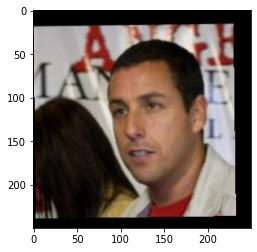

In [9]:
encoder.show_image('./sample_image.jpg')

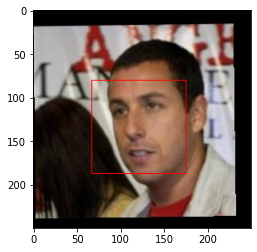

In [10]:
encoder.show_box_img('./sample_image.jpg')

In [11]:
encoder.encode_images(['./sample_image.jpg'], ['unknown'])

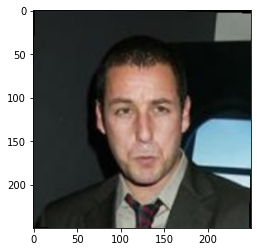

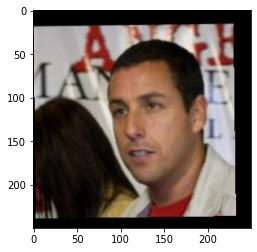

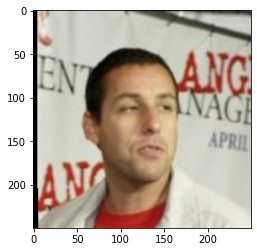

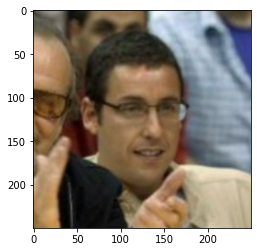

In [12]:
image_paths = glob.glob('./images/*')
encoder.show_matches(image_paths, './sample_image.jpg')